**Kaggle Breast Cancer Wisconsin Diagnosis using Logistic Regression**

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Dropping columns – ‘id’ and ‘Unnamed: 32’ as they have no role in prediction

In [8]:
df=df.drop(['Unnamed: 32', 'id'], axis = 1)

Checking the balance in Data:

In [9]:
Malignant = df[df['diagnosis'] == 1]
Benign = df[df['diagnosis'] == 0]
outlierFraction = float(len(Malignant))/(len(Benign))
print('Outlier Fraction:{}'.format(outlierFraction))
print('Malignant Cases: {}'.format(len(Malignant)))
print('Benign cases: {}'.format(len(Benign)))

Outlier Fraction:0.5938375350140056
Malignant Cases: 212
Benign cases: 357


Plotting Correletion Matrix

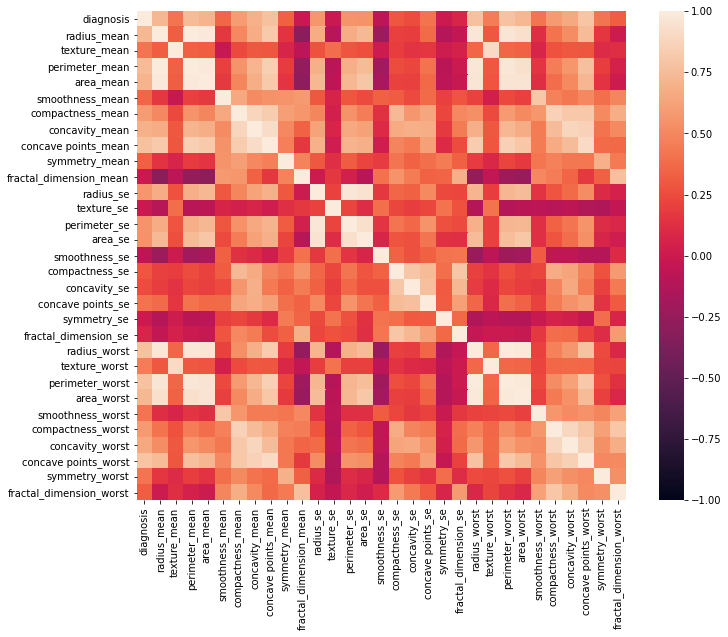

In [10]:
cm = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(cm,vmin=-1, vmax =1, square = True)
plt.show()

perimeter_mean and area_mean are highly correlated with radius_mean so we can drop them. perimeter_worst and area_worst can also be dropped as they are highly correlated with radius_worst

In [11]:
df=df.drop(['perimeter_mean', 'area_mean', 'perimeter_worst','area_worst'], axis = 1)

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Dviding data into x and y:

In [13]:
y = df.diagnosis.values
x_data = df.drop(['diagnosis'], axis = 1)

Normalisation

In [14]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

Splitting into training and testing data sets

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
  
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (426, 26)
x test:  (143, 26)
y train:  (426,)
y test:  (143,)


Building Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluating Parameters:

In [26]:
print("test accuracy: {} ".format(
    logreg.fit(x_train, y_train).score(x_test, y_test)))
print("train accuracy: {} ".format(
    logreg.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.972027972027972 
train accuracy: 0.9647887323943662 


In [27]:
yPred = logreg.predict(x_test)

In [29]:
from sklearn.metrics import  accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

n_errors = (yPred != y_test).sum()
print("The model used is Logistic Regression")

mse=mean_squared_error(y_test,yPred)
print("The Mean Squared Error is {}".format(mse))

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

The model used is Logistic Regression
The Mean Squared Error is 0.027972027972027972
The accuracy is 0.972027972027972
The precision is 0.9807692307692307
The recall is 0.9444444444444444
The F1-Score is 0.9622641509433962


Confusion Matrix:

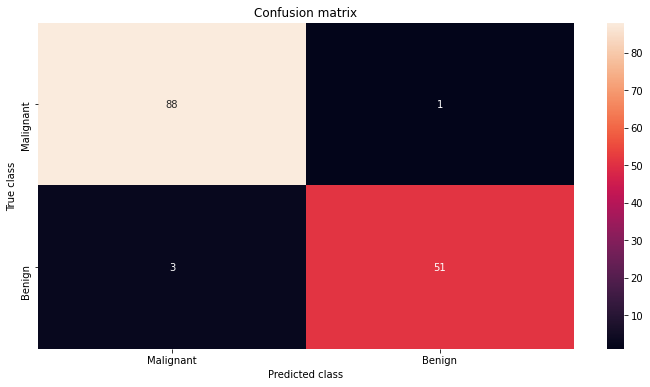

In [30]:
LABELS = ['Benign', 'Malignant']
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize =(12, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

 Checking results with linear_model.LogisticRegression

In [32]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)
print("test accuracy: {} ".format(
    logreg.fit(x_train, y_train).score(x_test, y_test)))
print("train accuracy: {} ".format(
    logreg.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.972027972027972 
train accuracy: 0.9647887323943662 
